# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

In [3]:
kickstarter_2018 = pd.read_csv("." + "/input/kickstarter-projects/ks-projects-201801.csv")

In [4]:
len(kickstarter_2018.index)

378661

In [6]:
filtered_df = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)]
len(filtered_df.index)

5125

In [8]:
kickstarter_2018[kickstarter_2018.name.isin(filtered_df.name)].groupby("name")["name"].count().sort_values()

name
"...The Last shall be first..." LODB Lifestyle Project     2
Rampart Castle Dice Tray                                   2
Rage                                                       2
Radiant                                                    2
Rabbit Island: Explore, Build, Conquer!                    2
RUIN                                                       2
ROW                                                        2
RGSP Magazine Vol.1                                        2
REVIVAL                                                    2
REDEFINING CHRONGRAPH WATCHES                              2
RED                                                        2
REBIRTH OF A NATION - A SUMMER OF LOVE TRIBUTE BOOK        2
REACTION                                                   2
RAMBLER                                                    2
RAGE                                                       2
Quodd Heroes                                               2
Quick Wordz (Cancel

In [9]:
kickstarter_2018[kickstarter_2018.name.isin(filtered_df.name)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
219,1000940032,Space Trucker,Video Games,Games,USD,2016-12-08,150.0,2016-11-08 08:20:27,165.00,successful,7,US,25.00,165.00,150.00
241,1001052357,Spilt Milk,Graphic Novels,Comics,AUD,2017-01-08,18000.0,2016-12-09 04:00:31,832.00,failed,23,AU,375.22,623.55,13490.22
250,1001110351,Kingdoms of Erden: King of the Mountain,Tabletop Games,Games,USD,2017-07-27,1000.0,2017-06-26 15:52:31,745.00,canceled,52,US,316.00,745.00,1000.00
392,10018239,Borders,Drama,Film & Video,GBP,2016-04-08,3500.0,2016-02-25 17:40:34,40.00,failed,2,GB,55.93,56.30,4926.39
453,1002139540,The Kindness of Strangers,Nonfiction,Publishing,USD,2014-09-15,3021.0,2014-08-31 20:40:19,113.00,failed,5,US,113.00,113.00,3021.00
474,1002269200,Redemption,Hip-Hop,Music,USD,2013-04-11,2000.0,2013-03-12 17:27:11,0.00,failed,0,US,0.00,0.00,2000.00
657,1003190758,Singularity,Comic Books,Comics,USD,2015-07-16,8500.0,2015-06-01 00:17:10,1579.00,failed,14,US,1579.00,1579.00,8500.00
716,1003494681,ONE,Shorts,Film & Video,USD,2014-10-12,10000.0,2014-08-30 09:06:44,1050.00,failed,8,US,1050.00,1050.00,10000.00
764,100372771,A Big Dream of a Little Man - Alex Oddman's De...,Music,Music,USD,2017-01-19,1.0,2016-12-20 22:01:21,7.00,canceled,1,US,7.00,7.00,1.00
788,100385010,Music Production,Electronic Music,Music,GBP,2016-03-13,1000.0,2016-02-12 12:37:08,0.00,failed,0,GB,0.00,0.00,1448.71


# Ejercicio 2

In [11]:
from hashlib import md5

In [12]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

In [19]:
hash_names = kickstarter_2018.name.apply(hashit)
hash_filtered_df = kickstarter_2018[hash_names.duplicated(keep=False)]

name_filtered_df = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)]

In [20]:
hash_filtered_df[~hash_filtered_df.name.isin(name_filtered_df.name)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


In [21]:
name_filtered_df[~name_filtered_df.name.isin(hash_filtered_df.name)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


# Ejercicio 3

In [22]:
import matplotlib.pyplot as plt
import ftfy.badness as bad
import seaborn as sns

In [23]:
datosEncodingISO8859 = pd.read_csv("." + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
datosEncodingDefault = pd.read_csv("." + "/input/kickstarter-projects/ks-projects-201801.csv")

In [24]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


datosEncodingISO8859['name_weirdness'] = datosEncodingISO8859['name'].apply(weird)
datosEncodingDefault['name_weirdness'] = datosEncodingDefault['name'].apply(weird)

In [25]:
len(datosEncodingISO8859[datosEncodingISO8859.name_weirdness > 1])

7682

In [26]:
len(datosEncodingDefault[datosEncodingDefault.name_weirdness > 1])

26

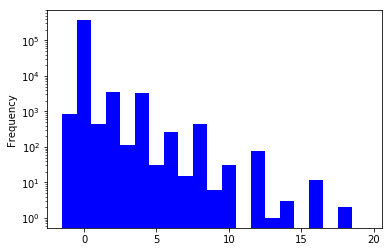

In [27]:
datosEncodingISO8859.name_weirdness.plot.hist(bins=[i+0.5 for i in range(-2,20)],color="blue")
plt.yscale('log')
plt.show()

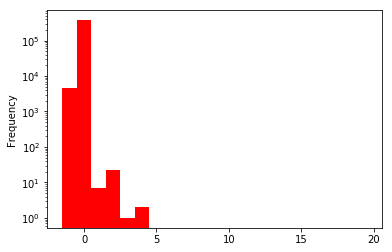

In [28]:
datosEncodingDefault.name_weirdness.plot.hist(bins=[i+0.5 for i in range(-2,20)],color="red")
plt.yscale('log')
plt.show()

# Ejercicio 4

In [25]:
column='currency'
# Create a label (category) encoder object
le_currency = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le_currency.fit(kickstarter_2018[column])

LabelEncoder()

In [26]:
dict(zip(le_currency.classes_,le_currency.transform(le_currency.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [27]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le_currency.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,a6828ae8a2eca25f0dd7035efc0af0a0,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,81609b3bdc0b96f429672d69702f2524,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,c12f5c3bace2f0213cdb2679a265dca0,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,4dbdcf09c86bbf5683ec39bc57b77f81,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,9c01404a2ef702811c2088ce139042ad,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [28]:
kickstarter_2018[column] = le_currency.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,a6828ae8a2eca25f0dd7035efc0af0a0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,81609b3bdc0b96f429672d69702f2524,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,c12f5c3bace2f0213cdb2679a265dca0,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,4dbdcf09c86bbf5683ec39bc57b77f81,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,9c01404a2ef702811c2088ce139042ad,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [29]:
from sklearn.preprocessing import LabelBinarizer
curr = 'currency'

lb_curr = LabelBinarizer()

lb_results = lb_curr.fit_transform(kickstarter_2018[curr])
pd.DataFrame(lb_results,index = kickstarter_2018['name'], columns=((curr + '_') + pd.Series(lb_curr.classes_))).head(10)
#pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_)))

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
name,,,,,,,,,,,,,,
a6828ae8a2eca25f0dd7035efc0af0a0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
81609b3bdc0b96f429672d69702f2524,0,0,0,0,0,0,0,0,0,0,0,0,0,1
c12f5c3bace2f0213cdb2679a265dca0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4dbdcf09c86bbf5683ec39bc57b77f81,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9c01404a2ef702811c2088ce139042ad,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3a26b565c8396d4867dda27816836e04,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1602dce9289c950176c41ce124944335,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1abb0a27e1a3ce5a79965e3022c6bddc,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3b3a87aebec0d9c1b3a4a5e4da7a88a8,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Ejercicio 5

In [30]:
kickstarter_2018 = pd.read_csv(".." + "/input/kickstarter-projects/ks-projects-201801.csv")

In [33]:
exitososSinPlata = kickstarter_2018[(kickstarter_2018['state'] == 'successful') & (kickstarter_2018['pledged'] < kickstarter_2018['goal'])]
exitososSinPlata

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
72483,1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.0,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00
151490,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.0,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00
232422,251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.0,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00
275777,4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.0,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00
335859,780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.0,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98


In [36]:
alcanzadoMeta = pd.DataFrame([[alcanzado, noAlcanzado] for alcanzado, noAlcanzado in zip(exitososSinPlata['pledged'], exitososSinPlata['goal'])], columns=['Alcanzado', 'Meta'])
alcanzadoMeta

,Alcanzado,Meta
0,3599.69,3600.0
1,30716.00,36000.0
2,7999.65,8000.0
3,1999.66,2000.0
4,24892.50,25000.0


In [38]:
alcanzadoMeta['Alcanzado']/alcanzadoMeta['Meta']*100

0    99.991389
1    85.322222
2    99.995625
3    99.983000
4    99.570000
dtype: float64

In [39]:
kickstarter_2018.groupby(['main_category', 'state']).aggregate('count').pivot_table(values='ID',index='state',columns='main_category')

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,2222.0,842.0,843.0,163.0,4152.0,2650.0,5755.0,2211.0,6202.0,523.0,3305.0,986.0,3602.0,4715.0,608.0
failed,14131.0,4036.0,5703.0,1235.0,14814.0,14182.0,32904.0,15969.0,16003.0,3137.0,21752.0,6384.0,23145.0,20616.0,3708.0
live,194.0,76.0,76.0,18.0,305.0,250.0,332.0,184.0,287.0,31.0,281.0,48.0,299.0,377.0,41.0
successful,11510.0,5842.0,2115.0,2338.0,10550.0,5593.0,23623.0,6085.0,12518.0,1012.0,24197.0,3305.0,12300.0,6434.0,6534.0
suspended,96.0,23.0,72.0,13.0,247.0,138.0,117.0,153.0,220.0,52.0,149.0,55.0,66.0,424.0,21.0
undefined,NaN,NaN,NaN,1.0,2.0,3.0,854.0,NaN,1.0,NaN,2234.0,1.0,462.0,3.0,1.0


# Ejercicio 6

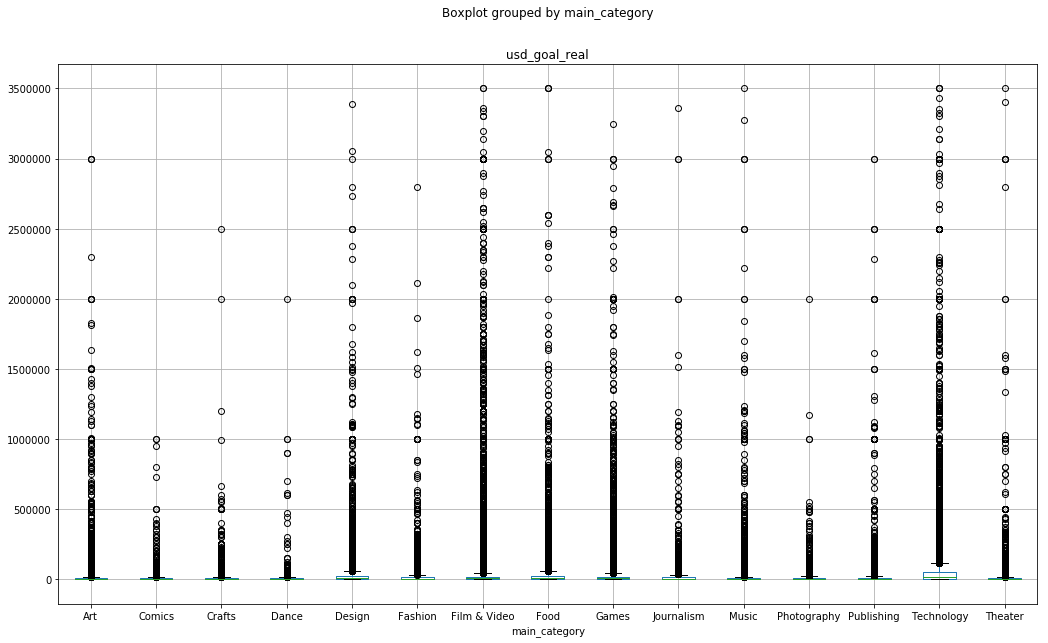

In [29]:
outliers_goal_real = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]

fig, ax = plt.subplots(figsize=(17,10))
kickstarter_2018.drop(outliers_goal_real.index).boxplot(by='main_category', column='usd_goal_real', ax=ax)

(0, 250000)

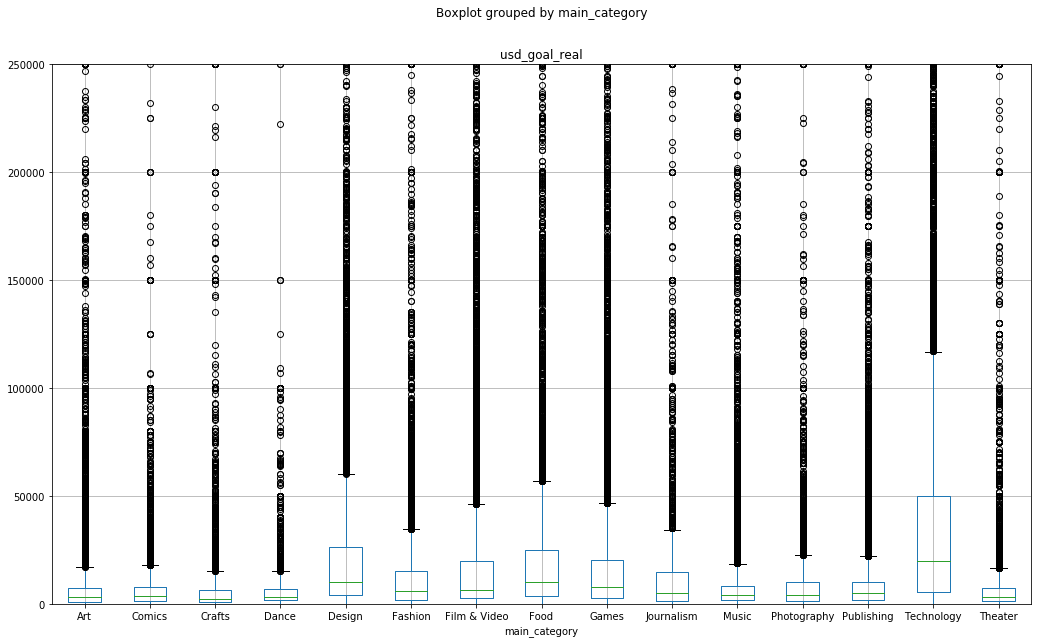

In [30]:
outliers_goal_real = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]

fig, ax = plt.subplots(figsize=(17,10))
kickstarter_2018.drop(outliers_goal_real.index).boxplot(by='main_category', column='usd_goal_real', ax=ax)
ax.set_ylim((0,250000))

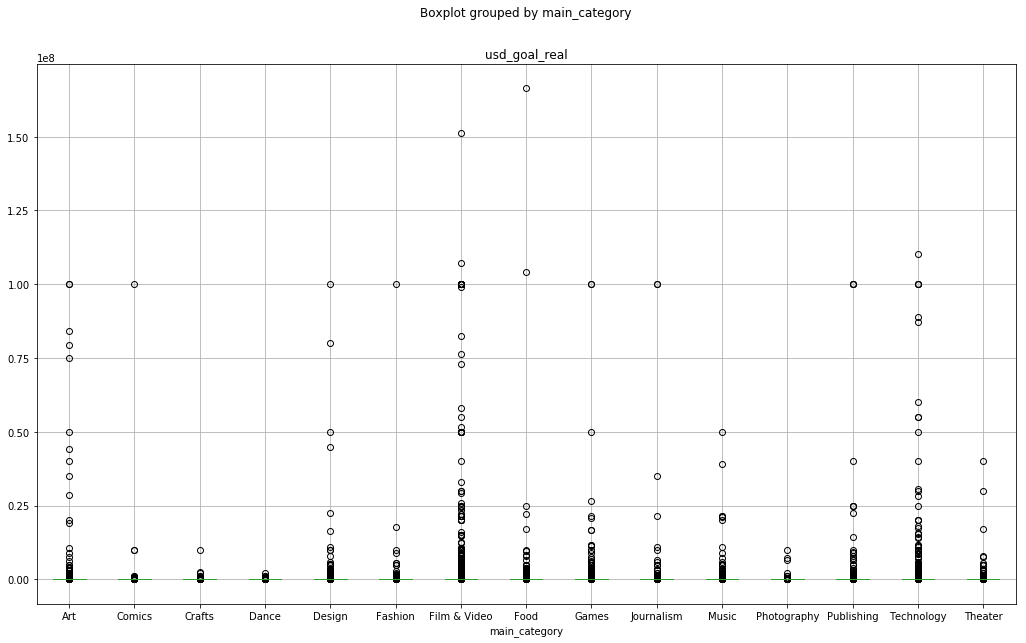

In [31]:
fig, ax = plt.subplots(figsize=(17,10))
kickstarter_2018.boxplot(by='main_category', column='usd_goal_real', ax=ax)

(0, 250000)

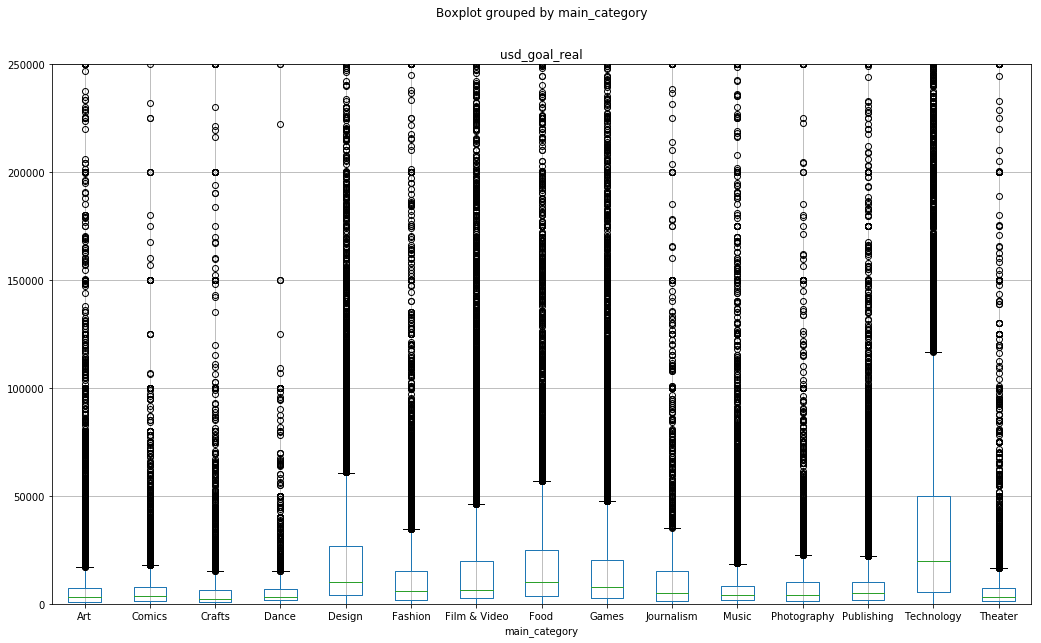

In [32]:
fig, ax = plt.subplots(figsize=(17,10))
kickstarter_2018.boxplot(by='main_category', column='usd_goal_real', ax=ax)
ax.set_ylim((0,250000))